In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ROOT
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing

%matplotlib inline
%jsroot on

Welcome to JupyROOT 6.22/01


In [2]:
positron_features_data = pd.read_pickle("new_combined_data_positron_features_82.pkl")
positron_features_data

,beamEnergy,trueBeamEnergy,features_82
71746,20.0,20.000000,"[19.620185911655426, 42.86726224422455, 81.833..."
258314,100.0,99.830002,"[19.80180013179779, 111.67931747436523, 307.72..."
18871,20.0,20.000000,"[31.33267619460821, 80.87321257591248, 191.973..."
127926,50.0,49.990002,"[14.808391571044922, 67.0694465637207, 123.298..."
79205,20.0,20.000000,"[7.694568514823914, 43.950953245162964, 61.200..."
...,...,...,...
196232,100.0,99.830002,"[21.99822837114334, 96.83178961277008, 274.127..."
225431,100.0,99.830002,"[24.746097564697266, 70.07785701751709, 225.84..."
428402,300.0,287.179993,"[9.173689126968384, 29.458719730377197, 129.79..."
419756,300.0,287.179993,"[35.232404470443726, 100.07887268066406, 326.3..."


In [13]:
positron_features_data.loc[(positron_features_data.beamEnergy==300)].describe()

,beamEnergy,trueBeamEnergy
count,79303.0,79303.000000
mean,300.0,287.179962
std,0.0,0.000000
min,300.0,287.179993
25%,300.0,287.179993
50%,300.0,287.179993
75%,300.0,287.179993
max,300.0,287.179993


In [60]:
def lay_data(df):
    return df.features_82[:28]

In [61]:
positron_features_data["lay_data"] = positron_features_data.apply(lay_data, axis=1)
positron_features_data

,beamEnergy,trueBeamEnergy,features_82,lay_data
71746,20.0,20.000000,"[19.620185911655426, 42.86726224422455, 81.833...","[19.620185911655426, 42.86726224422455, 81.833..."
258314,100.0,99.830002,"[19.80180013179779, 111.67931747436523, 307.72...","[19.80180013179779, 111.67931747436523, 307.72..."
18871,20.0,20.000000,"[31.33267619460821, 80.87321257591248, 191.973...","[31.33267619460821, 80.87321257591248, 191.973..."
127926,50.0,49.990002,"[14.808391571044922, 67.0694465637207, 123.298...","[14.808391571044922, 67.0694465637207, 123.298..."
79205,20.0,20.000000,"[7.694568514823914, 43.950953245162964, 61.200...","[7.694568514823914, 43.950953245162964, 61.200..."
...,...,...,...,...
196232,100.0,99.830002,"[21.99822837114334, 96.83178961277008, 274.127...","[21.99822837114334, 96.83178961277008, 274.127..."
225431,100.0,99.830002,"[24.746097564697266, 70.07785701751709, 225.84...","[24.746097564697266, 70.07785701751709, 225.84..."
428402,300.0,287.179993,"[9.173689126968384, 29.458719730377197, 129.79...","[9.173689126968384, 29.458719730377197, 129.79..."
419756,300.0,287.179993,"[35.232404470443726, 100.07887268066406, 326.3...","[35.232404470443726, 100.07887268066406, 326.3..."


In [62]:
X = np.stack(positron_features_data.head(400000).lay_data.values)
X.shape

(400000, 28)

In [63]:
Y = (positron_features_data.head(400000).trueBeamEnergy.values).reshape(400000,1)
print(Y)
Y.shape

[[20.  ]
 [99.83]
 [20.  ]
 ...
 [99.83]
 [99.83]
 [20.  ]]


(400000, 1)

In [64]:
theta = np.matmul( np.linalg.pinv( np.matmul(X.T, X) ) , np.matmul(X.T, Y) )
print(theta)
theta.shape

[[0.01544584]
 [0.01074829]
 [0.00974702]
 [0.00991524]
 [0.00959205]
 [0.00960706]
 [0.00957695]
 [0.00996061]
 [0.00958206]
 [0.00978693]
 [0.00933981]
 [0.0100433 ]
 [0.00924941]
 [0.01003225]
 [0.0093998 ]
 [0.01021921]
 [0.00905533]
 [0.01007396]
 [0.00945412]
 [0.00984381]
 [0.00977161]
 [0.01081531]
 [0.00984633]
 [0.01295793]
 [0.0114097 ]
 [0.01695564]
 [0.02027191]
 [0.02962011]]


(28, 1)

No handles with labels found to put in legend.


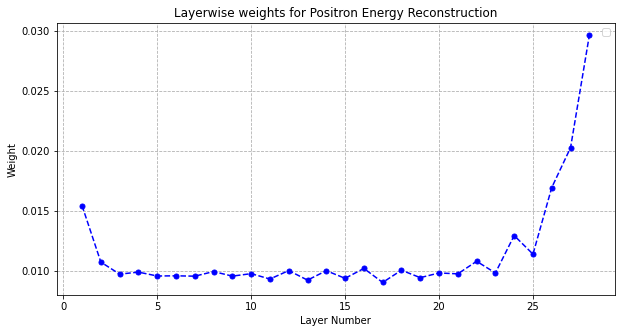

In [66]:
lay = [i for i in range(1,29)]

plt.figure(figsize=[10,5])

#plt.plot([28.5,28.5], [-0.05, 0.35],  linestyle="-", color="r", markersize=10)
#plt.plot([40.5,40.5], [-0.05, 0.35],  linestyle="-", color="r", markersize=10)

plt.plot(lay, theta, "r.", linestyle="--", color="b", markersize=10)


plt.xlabel("Layer Number")
plt.ylabel("Weight")
plt.title("Layerwise weights for Positron Energy Reconstruction")


#plt.text(12, 0.25, 'ECAL', fontsize=20, horizontalalignment='center',verticalalignment='center')
#plt.text(34.5, 0.25, 'HCAL', fontsize=20, horizontalalignment='center',verticalalignment='center')
#plt.text(62, 0.25, 'AHCAL', fontsize=20, horizontalalignment='center',verticalalignment='center')


plt.grid(linestyle='--')
plt.legend()
plt.show()

In [67]:
x_test_set = positron_features_data.tail(497521-400000)
x_test_set

,beamEnergy,trueBeamEnergy,features_82,lay_data
237204,100.0,99.830002,"[37.76328933238983, 112.00972032546997, 290.26...","[37.76328933238983, 112.00972032546997, 290.26..."
71497,20.0,20.000000,"[6.591415703296661, 17.634368896484375, 33.586...","[6.591415703296661, 17.634368896484375, 33.586..."
206213,100.0,99.830002,"[28.69572901725769, 126.88083711266518, 478.22...","[28.69572901725769, 126.88083711266518, 478.22..."
152992,50.0,49.990002,"[13.437503337860107, 62.55970764160156, 126.07...","[13.437503337860107, 62.55970764160156, 126.07..."
54087,20.0,20.000000,"[71.8902325630188, 92.1888747215271, 230.65336...","[71.8902325630188, 92.1888747215271, 230.65336..."
...,...,...,...,...
196232,100.0,99.830002,"[21.99822837114334, 96.83178961277008, 274.127...","[21.99822837114334, 96.83178961277008, 274.127..."
225431,100.0,99.830002,"[24.746097564697266, 70.07785701751709, 225.84...","[24.746097564697266, 70.07785701751709, 225.84..."
428402,300.0,287.179993,"[9.173689126968384, 29.458719730377197, 129.79...","[9.173689126968384, 29.458719730377197, 129.79..."
419756,300.0,287.179993,"[35.232404470443726, 100.07887268066406, 326.3...","[35.232404470443726, 100.07887268066406, 326.3..."


In [68]:
def energy(df):
    return np.matmul(theta.T, df.lay_data)[0]

In [69]:
x_test_set["pred_energy"] = x_test_set.apply(energy, axis=1)
x_test_set

<ipython-input-69-db3dc0cc2b64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_set["pred_energy"] = x_test_set.apply(energy, axis=1)


,beamEnergy,trueBeamEnergy,features_82,lay_data,pred_energy
237204,100.0,99.830002,"[37.76328933238983, 112.00972032546997, 290.26...","[37.76328933238983, 112.00972032546997, 290.26...",100.204520
71497,20.0,20.000000,"[6.591415703296661, 17.634368896484375, 33.586...","[6.591415703296661, 17.634368896484375, 33.586...",20.169362
206213,100.0,99.830002,"[28.69572901725769, 126.88083711266518, 478.22...","[28.69572901725769, 126.88083711266518, 478.22...",101.152295
152992,50.0,49.990002,"[13.437503337860107, 62.55970764160156, 126.07...","[13.437503337860107, 62.55970764160156, 126.07...",48.873972
54087,20.0,20.000000,"[71.8902325630188, 92.1888747215271, 230.65336...","[71.8902325630188, 92.1888747215271, 230.65336...",18.901139
...,...,...,...,...,...
196232,100.0,99.830002,"[21.99822837114334, 96.83178961277008, 274.127...","[21.99822837114334, 96.83178961277008, 274.127...",103.512014
225431,100.0,99.830002,"[24.746097564697266, 70.07785701751709, 225.84...","[24.746097564697266, 70.07785701751709, 225.84...",100.938180
428402,300.0,287.179993,"[9.173689126968384, 29.458719730377197, 129.79...","[9.173689126968384, 29.458719730377197, 129.79...",280.897832
419756,300.0,287.179993,"[35.232404470443726, 100.07887268066406, 326.3...","[35.232404470443726, 100.07887268066406, 326.3...",288.870767


In [70]:
energy=[20, 50, 100, 200, 300]
pred_energy_positron = []

for i in energy:
    pred_energy_positron.append(x_test_set.loc[x_test_set.beamEnergy==i].pred_energy.values)
    
pred_energy_positron

[array([20.1693622 , 18.90113866, 19.35907576, ..., 20.18732201,
        21.1081304 , 19.61464149]),
 array([48.87397184, 52.97645357, 49.73131341, ..., 49.78232587,
        49.323803  , 48.93393219]),
 array([100.20451964, 101.15229465,  98.00854043, ..., 100.0863923 ,
        103.51201374, 100.93818016]),
 array([194.80441651, 194.39138876, 201.52250083, ..., 200.57414262,
        192.66328333, 194.77443073]),
 array([283.54536917, 284.29297136, 287.37236755, ..., 277.82899011,
        280.89783233, 288.8707666 ])]

In [71]:
%jsroot on
c = ROOT.TCanvas()

H_positron_pred_20 = ROOT.TH1F("H_positron_pred_20","Reconstructed Energy Distribution (pion);Energy(GeV);Normalized Entries",100,-10,400)
H_positron_pred_50 = ROOT.TH1F("H_positron_pred_50","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_positron_pred_100 = ROOT.TH1F("H_positron_pred_100","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_positron_pred_200 = ROOT.TH1F("H_positron_pred_200","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_positron_pred_300 = ROOT.TH1F("H_positron_pred_300","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)



for i in range(pred_energy_positron[0].size):
    H_positron_pred_20.Fill(pred_energy_positron[0][i])
    
for i in range(pred_energy_positron[1].size):
    H_positron_pred_50.Fill(pred_energy_positron[1][i])
    
for i in range(pred_energy_positron[2].size):
    H_positron_pred_100.Fill(pred_energy_positron[2][i])
    
for i in range(pred_energy_positron[3].size):
    H_positron_pred_200.Fill(pred_energy_positron[3][i])
    
for i in range(pred_energy_positron[4].size):
    H_positron_pred_300.Fill(pred_energy_positron[4][i])
    


H_positron_pred_20.SetLineColor(1)
H_positron_pred_50.SetLineColor(2)
H_positron_pred_100.SetLineColor(3)
H_positron_pred_200.SetLineColor(4)
H_positron_pred_300.SetLineColor(5)




H_positron_pred_20.Draw()
H_positron_pred_50.Draw('same')
H_positron_pred_100.Draw('same')
H_positron_pred_200.Draw('same')
H_positron_pred_300.Draw('same')



#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_positron_pred_20 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron_pred_50 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron_pred_100 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron_pred_200 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron_pred_300 (Potential memory leak).


In [72]:
positron_means = []
positron_stds = []

positron_means.append(H_positron_pred_20.GetMean())
positron_means.append(H_positron_pred_50.GetMean())
positron_means.append(H_positron_pred_100.GetMean())
positron_means.append(H_positron_pred_200.GetMean())
positron_means.append(H_positron_pred_300.GetMean())

positron_stds.append(H_positron_pred_20.GetStdDev())
positron_stds.append(H_positron_pred_50.GetStdDev())
positron_stds.append(H_positron_pred_100.GetStdDev())
positron_stds.append(H_positron_pred_200.GetStdDev())
positron_stds.append(H_positron_pred_300.GetStdDev())

print(positron_means)
positron_stds


[19.737455197610522, 49.828752988885135, 99.79333515123578, 197.13848975703655, 287.1216811560381]


[1.8781667573602856,
 2.2716709161722064,
 2.8803391464387085,
 4.154039203975118,
 6.457461325058843]

In [82]:
#for NN

#mean_nn = [20.505899180299842, 49.630283699027764, 100.00090335626419, 200.08073072534378, 292.6602452856595]

#std_nn = [1.7450590518589297, 2.2600263426117486, 3.0250932040168634, 4.230871882172724, 5.310850225870337]

In [1]:
plt.plot(energy, np.array(positron_stds)/np.array(positron_means), "b.",  linestyle="--", label="Normal Equation", color="b", markersize=10)
#plt.plot(energy, np.array(std_nn)/np.array(mean_nn), "r.",  linestyle="--", label="NN",color="r", markersize=10)


plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Positron Energy Resolution using Normal Equation")

#plt.ylim([0.01,.1])

plt.grid(linestyle='--')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [78]:
positron_features_data.loc[(positron_features_data.beamEnergy==300)].describe()

,beamEnergy,trueBeamEnergy
count,79303.0,79303.000000
mean,300.0,287.179962
std,0.0,0.000000
min,300.0,287.179993
25%,300.0,287.179993
50%,300.0,287.179993
75%,300.0,287.179993
max,300.0,287.179993


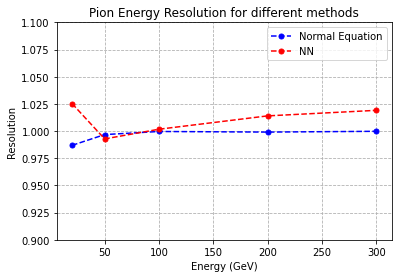

In [87]:
true_energy = np.array([20, 49.989998, 99.829994, 197.320053, 287.179962])

plt.plot(energy, np.array(positron_means)/true_energy, "b.", label="Normal Equation",  linestyle="--", color="b", markersize=10)
plt.plot(energy, np.array(mean_nn)/true_energy, "r.", label="NN",  linestyle="--", color="r", markersize=10)


plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Pion Energy Resolution for different methods")

plt.ylim([0.9,1.1])

plt.grid(linestyle='--')
plt.legend()
plt.show()